<a href="https://colab.research.google.com/github/ajiwira/DATMIN2/blob/main/043_Aji_Wira_Ksatria_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [4]:
df = pd.read_csv("dataset1.csv") # df untuk membaca file excel dataset.xlsx dengan method read_excel dengan nama sheet DatasetBaru - Sheet1
# Lihat Data Tabular item pada variavel dfa
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.sum() # menghitung jumlah nilai di setiap kolom

whole milk             5
pasrty                 1
salty snack            2
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             4
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [6]:
df.columns # mengetahui kolom apa saja yang ada pada dataset

Index(['whole milk', 'pasrty', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [7]:
from itertools import permutations #Library untuk buat kombinasi barang
rules = list(permutations(df.columns, 2)) # untuk menyimpan seluruh kemungkinan kombinasi barang
rules # untuk menampilkan keseluruhan hasil kombinasi

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [8]:
# Menghitung kemunculan kombinasi yang ada pada dataset
rule_baru = [] # Menyimpan data dalam bentuk list
for rule in rules: # Mengulangi pembacaan dataset
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0: # Menentukan apakah kombinasi tersebut ada atau tidak
    rule_baru.append(rule) # Menyimpan hasil pengecekan dalam bentuk tuple didalam list
rule_baru # Menampilkan hasil

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('salty snack', 'root vegetables'),
 ('salty snack', 'detergent'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hy

In [9]:
hitung = {} # Menyimpan data dalam bentuk dictionary
for rule in rule_baru:  # Mengulangi pembacaan dataset
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1) # Menentukan berapa jumlah kemunculan kombinasi dan menyimpannya dalam sebuah variabel
      ])
  hitung[str(rule)] = banyak_data # Menambahkan hasil penentuan ke dalam dictionary
hitung # Menampilkan hasil

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('salty snack', 'root vegetables')": 1,
 "('salty snack', 'detergent')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('s

In [10]:
# Melihat banyak transaksi
len(df)

19

In [11]:
# List support
# 
for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  print(f"{item} support = {ab/len(df)*100}%") # Menghitung support pada tiap tiap kombinasi item dan menampilkannya

('whole milk', 'pasrty') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pasrty', 'whole milk') support = 5.263157894736842%
('pasrty', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pasrty') support = 5.263157894736842%
('salty snack', 'root vegetables') support = 5.263157894736842%
('salty snack', 'detergent') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygiene articles'

In [12]:
# List Confidens

for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%") # Menghitung confidence pada tiap tiap kombinasi item dan menampilkannya

whole milk->pasrty  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pasrty->whole milk  Confidence = 100.0%
pasrty->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 50.0%
salty snack->pasrty  Confidence = 50.0%
salty snack->root vegetables  Confidence = 50.0%
salty snack->detergent  Confidence = 50.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt-

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

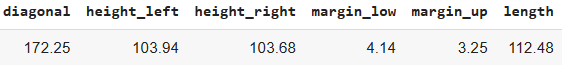
<!-- 1412 -->

### Collect and Describe Data

In [13]:
df2 = pd.read_csv("dataset2.csv")
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


### 1. Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan

In [14]:
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal'    : [172.25],
                         'height_left' : [103.94],
                         'height_right': [103.68],
                         'margin_low'  : [4.14],
                         'margin_up'   : [3.25],
                         'length'      : [112.48]})

# menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
distances = []
for i in range(len(df2)):
    row = df2.iloc[i]
    distance = np.sqrt((row['diagonal'] - new_data['diagonal']) ** 2 +
                       (row['height_left'] - new_data['height_left']) ** 2 +
                       (row['height_right'] - new_data['height_right']) ** 2 +
                       (row['margin_low'] - new_data['margin_low']) ** 2 +
                       (row['margin_up'] - new_data['margin_up']) ** 2 +
                       (row['length'] - new_data['length']) ** 2)
    distances.append(distance)

# Menambahkan kolom distance ke dataframe utama
df2['distance'] = distances

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df2['distance'])


Tabel Jarak : 
0    0    0.671267
dtype: float64
1    0    1.458321
dtype: float64
2    0    0.834626
dtype: float64
3    0    0.910934
dtype: float64
4    0    1.312593
dtype: float64
5    0    2.421281
dtype: float64
6    0    1.741896
dtype: float64
7    0    1.113463
dtype: float64
8    0    1.722034
dtype: float64
9    0    1.738217
dtype: float64
Name: distance, dtype: object


### 1.1 Menambahkan Kolom Jarak

In [15]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,distance
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0 0.671267 dtype: float64
1,True,171.66,103.68,103.41,4.35,3.33,113.74,0 1.458321 dtype: float64
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0 0.834626 dtype: float64
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0 0.910934 dtype: float64
4,True,171.79,104.57,104.04,4.26,3.15,113.46,0 1.312593 dtype: float64
5,False,172.00,104.23,104.52,5.76,3.37,110.94,0 2.421281 dtype: float64
6,False,171.56,104.03,103.93,5.47,3.50,111.67,0 1.741896 dtype: float64
7,False,171.90,104.33,104.40,4.70,3.31,112.12,0 1.113463 dtype: float64
8,False,171.84,104.06,104.10,4.87,3.25,111.04,0 1.722034 dtype: float64
9,False,172.11,104.14,104.15,4.84,3.28,110.98,0 1.738217 dtype: float64


### 2. Mengurutkan data berdasarkan K jarak terdekat (dengan k = akar 2 dari banyak data)

In [16]:
# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - 172.25)**2
    + (df2['height_left'] - 103.94)**2
    + (df2['height_right'] - 103.68)**2
    + (df2['margin_low'] - 4.14)**2
    + (df2['margin_up'] - 3.25)**2
    + (df2['length'] - 112.48)**2
)

# Mengurutkan data dari kecil ke besar dan menentukan data terdekat
k = int(np.sqrt(len(df2)))
data_terdekat = df2.sort_values('distance').head(k)

# Menampilkan data terdekat
print(data_terdekat)


   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


### 3.  Menentukan hasil prediksi berdasarkan label terbanyak

In [17]:
# Mengimpor library sklearn untuk menggunakan algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)

print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True ")
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 
Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True





# (3) Analisis

> Nama : Aji Wira Ksatria

> Nim : 2109116043 


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Bussiness Understanding

Dataset Student perfomance prediction merupakan kumpulan data dari siswa yang telah melakukan ujian dimana terdapat 3 pelajaran yang diujikan yaitu matematika, membaca, dan menulis

In [18]:
dt1 = pd.read_csv('exams.csv')
dt1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


Data Understanding

In [19]:
import numpy as np

In [20]:
dt1.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [21]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
dt1.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [23]:
dt1.columns = dt1.columns.str.replace(' ', '_')
dt1.columns = dt1.columns.str.replace('-', '_')

In [24]:
dt1

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


Explore Data

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

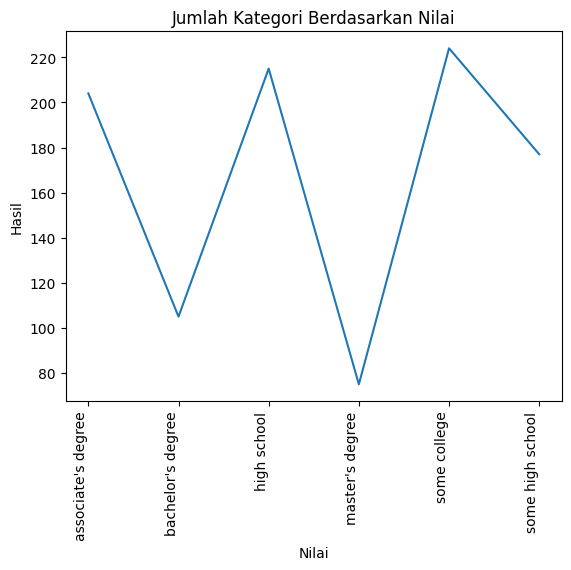

In [26]:
kategori = dt1['parental_level_of_education']

nilai = kategori.value_counts()

nilai = nilai.sort_index()

plt.plot(nilai.index, nilai.values)

plt.title('Jumlah Kategori Berdasarkan Nilai')

plt.xlabel('Nilai')
plt.ylabel('Hasil')
plt.xticks(rotation=90, ha='right')


plt.show()

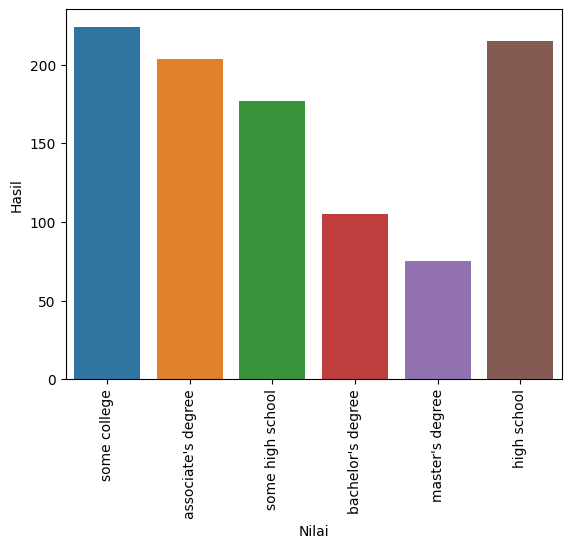

In [27]:
kategori = sns.countplot(x='parental_level_of_education', data=dt1)

kategori.set_xlabel("Nilai")
kategori.set_ylabel("Hasil")

plt.xticks(rotation=90)

plt.show()

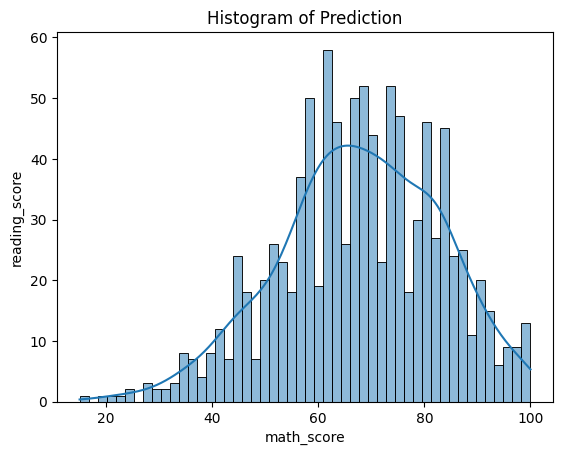

In [28]:
import seaborn as sns

sns.histplot(data=dt1, x="math_score", kde=True,bins=50)
plt.xlabel('math_score')
plt.ylabel('reading_score')
plt.title('Histogram of Prediction')
plt.show()

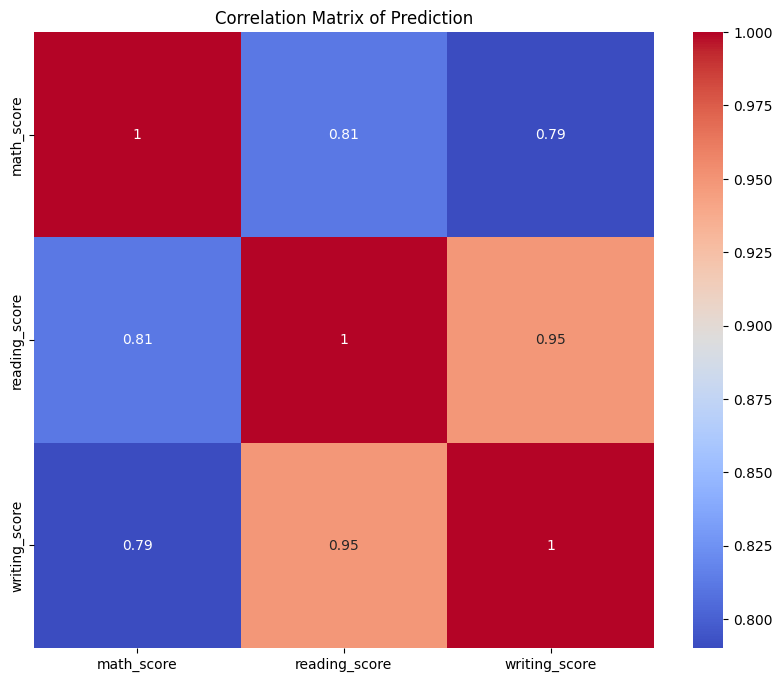

In [29]:
import seaborn as sns

# create correlation matrix
corr_matrix = dt1.corr()

# create heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Prediction')
plt.show()

#Data Preparation

Missing Value

In [30]:
dt1.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [31]:
dt1.dropna(inplace=True)
if dt1.isnull().any().any():
    print("Terdapat nilai null pada dataset")
else:
    print("Semua data terisi")

Semua data terisi


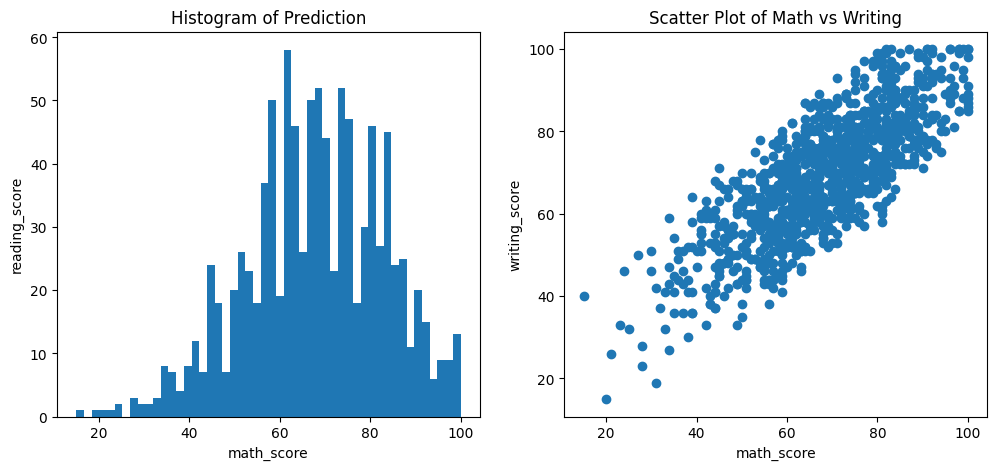

In [32]:
# create figure and subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# create histogram on the first subplot
ax1.hist(dt1['math_score'], bins=50)
ax1.set_xlabel('math_score')
ax1.set_ylabel('reading_score')
ax1.set_title('Histogram of Prediction')

# create scatter plot on the second subplot
ax2.scatter(dt1['math_score'], dt1['writing_score'])
ax2.set_xlabel('math_score')
ax2.set_ylabel('writing_score')
ax2.set_title('Scatter Plot of Math vs Writing')

# display the plot
plt.show()

In [33]:
# calculate quantiles
q1 = dt1['math_score'].quantile(0.25)
q2 = dt1['math_score'].quantile(0.5)
q3 = dt1['math_score'].quantile(0.75)

# print quantiles
print('Q1:', q1)
print('Q2:', q2)
print('Q3:', q3)

Q1: 58.0
Q2: 68.0
Q3: 79.25


In [34]:
iqr = q3 - q1
print('Interquartile Range', iqr)

Interquartile Range 21.25


In [35]:
low_bound = q1 - 1.5*iqr
up_bound = q3 + 1.5*iqr

In [36]:
outlier = dt1[(dt1['math_score'] < low_bound) | (dt1['math_score'] > up_bound)]
outlier

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
72,female,group C,some high school,standard,none,23,33,33
228,male,group C,high school,free/reduced,none,20,25,15
480,female,group C,high school,standard,none,21,30,26
492,female,group D,some high school,standard,none,25,33,32
586,female,group D,high school,free/reduced,none,15,39,40
693,female,group C,high school,free/reduced,none,24,48,46


In [37]:
no_outlier = dt1[~(dt1['math_score'] < low_bound) | (dt1['math_score'] > up_bound)]
no_outlier

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62
